<a href="https://colab.research.google.com/github/fesilva2109/intro_data_science/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv"
notas = pd.read_csv(url)
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas.shape


(100836, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas ["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas ["nota"].value_counts()


,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
notas ["nota"].mean()


3.501556983616962

<Axes: ylabel='Frequency'>

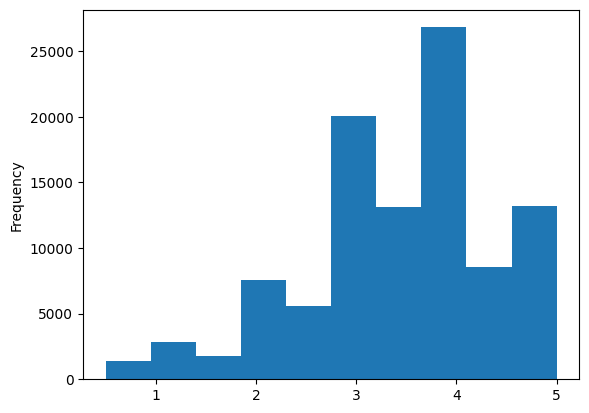

In [ ]:
notas ["nota"].plot(kind="hist")

<Axes: ylabel='nota'>

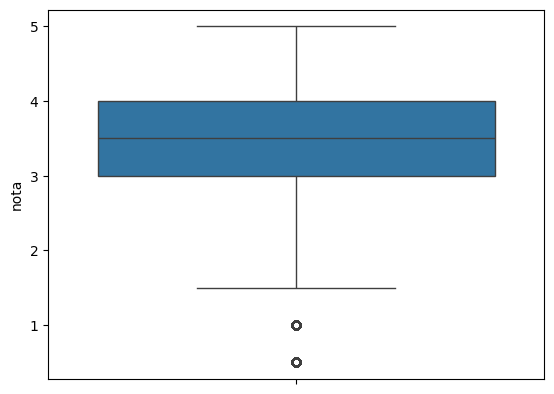

In [ ]:
import seaborn as sns
sns.boxplot(notas.nota)



In [ ]:
filmes = pd.read_csv("dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Text(-3.6805555555555554, 0.5, 'Frequência')

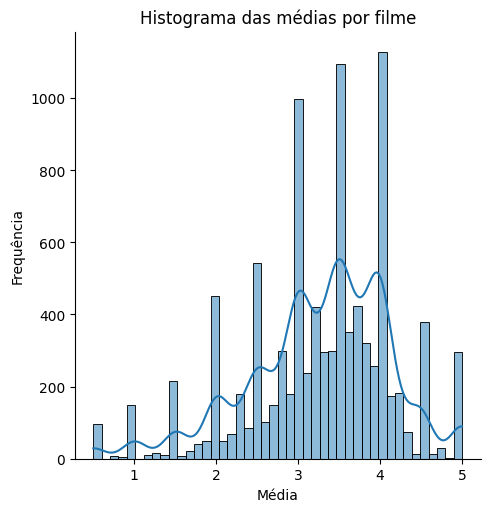

In [ ]:
import matplotlib.pyplot as plt

medias_por_filme = notas.groupby("filmeId")["nota"].mean().sort_values(ascending=False)
sns.displot(medias_por_filme,kde = True)
plt.title("Histograma das médias por filme")
plt.xlabel("Média")
plt.ylabel("Frequência")

In [ ]:
filmes.query("filmeId == 71810")["titulo"]


,titulo
7162,Legionnaire (1998)


In [ ]:
filmes["generos"].value_counts()

,count
generos,
Drama,1053
Comedy,946
Comedy|Drama,435
Comedy|Romance,363
Drama|Romance,349
Documentary,339
Comedy|Drama|Romance,276
Drama|Thriller,168
Horror,167


In [ ]:
notas_com_titulo = notas.join(filmes.set_index('filmeId'), on='filmeId')
notas_genero = notas_com_titulo.groupby("generos")["nota"].mean().sort_values(ascending=False)

<Axes: ylabel='Frequency'>

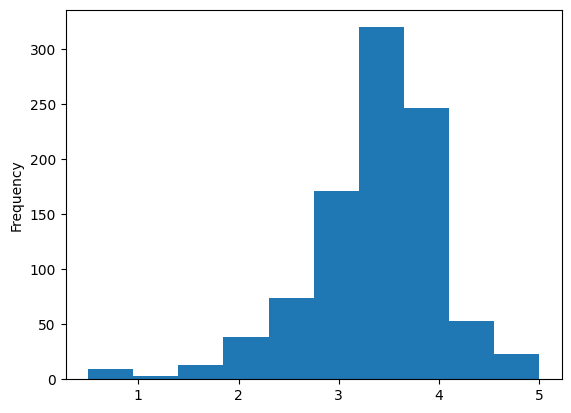

In [ ]:
notas_genero.plot(kind="hist")